In [117]:
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

In [121]:
runs_root = Path('../runs')
for c in runs_root.iterdir():
    print(c.name)

dqn_dense_ms_ec_eps0_smallrandoms
reinforce_ms100x_mediumrandoms
reinforce_ms100x_smallrandoms
a2c_ms100x_mediumrandoms
dqn_dense_ms_ec_eps0_mediumrandoms
dqn_linkedqap_mediumrandoms
a2c_mediumrandoms
dqn_dense_ms_ec_eps0_rni_study


In [193]:
experiment_names = ["dqn_linkedqap_mediumrandoms"]
paths = []
for experiment in experiment_names:
    paths += sorted((runs_root / experiment).iterdir())

In [194]:
import drlqap.experiment as exp

In [195]:
metadatas = [exp.load_metadata(path) for path in paths]

In [196]:
metadatas[0]

{'agent_type': 'dqn_linkedqap',
 'agent_arguments': {'learning_rate': 1e-05,
  'gnn_depth': 2,
  'hidden_size': 32},
 'training_task': 'small_random_graphs',
 'training_steps': 10000,
 'seed': 1}

In [197]:
from drlqap.evaltools import load_float_txt
values = [load_float_txt(path / "value.txt") for path in paths]

In [198]:
metadata = [
    {
        'path': path,
        'seed': meta['seed'],
        'agent_type': meta['agent_type'],
        **meta['agent_arguments'],
    }
    for path, meta in zip(paths, metadatas)
]
meta_df = pd.DataFrame(metadata)

In [199]:
meta_index = pd.MultiIndex.from_frame(meta_df)

In [200]:
df = pd.DataFrame(values, index = meta_index)

In [201]:
# Filter data manually here
#df = df.query('seed < 3 and learning_rate > 1e-5')

In [202]:
df

,,,,,,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
path,seed,agent_type,learning_rate,gnn_depth,hidden_size,,,,,,,,,,,,,,,,,,,,,
../runs/dqn_linkedqap_mediumrandoms/lr1e-5_s1,1,dqn_linkedqap,0.00001,2,32,12.825319,17.238815,10.518022,16.134382,11.648239,17.098024,18.336837,18.447076,15.082659,9.548809,...,13.458895,13.904855,13.192038,12.369636,13.822504,14.000431,15.880046,13.040015,14.026926,17.448868
../runs/dqn_linkedqap_mediumrandoms/lr1e-5_s1_2,1,dqn_linkedqap,0.00001,2,64,14.144256,16.986509,10.487651,16.930188,11.802340,17.796506,18.019720,19.789889,15.914438,10.081218,...,15.381789,13.026081,14.957825,17.192689,16.692474,14.765558,17.002644,17.294982,17.177538,18.723854
../runs/dqn_linkedqap_mediumrandoms/lr1e-5_s1_3,1,dqn_linkedqap,0.00001,3,32,13.713228,15.771117,9.627531,14.954641,12.070893,15.570923,16.397005,18.012656,14.286573,9.083905,...,13.861688,14.916430,12.944195,14.254404,13.974539,14.035587,14.934683,14.131075,14.151707,18.065102
../runs/dqn_linkedqap_mediumrandoms/lr1e-5_s1_4,1,dqn_linkedqap,0.00001,3,64,14.040268,17.631312,11.587796,15.915649,11.346356,18.887960,18.045313,19.063396,15.409088,8.575189,...,13.412746,13.305505,11.993325,14.254404,14.121284,13.873250,14.194540,13.155423,14.151708,18.279668
../runs/dqn_linkedqap_mediumrandoms/lr1e-5_s1_5,1,dqn_linkedqap,0.00001,4,32,11.942827,14.687806,8.811973,13.553922,10.862922,16.156548,17.197914,16.987542,14.207709,9.716254,...,13.412746,13.428533,11.993325,13.940271,14.428955,14.692519,13.600065,14.131075,14.151707,18.279668
../runs/dqn_linkedqap_mediumrandoms/lr1e-5_s1_6,1,dqn_linkedqap,0.00001,4,64,12.576027,14.606100,10.721417,14.326734,10.899729,16.664244,17.384323,17.464740,14.510051,9.095588,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
def aggregate(df, key, window, agg):
        return df.groupby(key).aggregate(agg).transpose().rolling(window).mean()

def generate_variation_plot(df, keys, window):
    if type(keys) != list:
        keys = [keys]
    
    mean = aggregate(df, keys, window, 'mean')
    upper = aggregate(df, keys, window, 'max')
    lower = aggregate(df, keys, window, 'min')
    cmap = matplotlib.cm.get_cmap('tab10')
    count = len(mean.columns)
    for i, col in enumerate(mean.columns):
        color = cmap(i)
        #plt.fill_between(mean[col].index, lower[col], upper[col], alpha=0.1, color=color)
        if len(keys) > 1:
            matching_indices = None
            for i, k in enumerate(keys):
                m = df.index.get_level_values(k) == col[i] 
                matching_indices = matching_indices & m if matching_indices is not None else m
        else:
            matching_indices = (df.index.get_level_values(keys[0]) == col)
        individuals = df[matching_indices].transpose().rolling(window).mean()
        for i in individuals:
            plt.plot(individuals[i], alpha=0.15, linewidth=8, color=color)
        plt.plot(mean[col], label=col, color=color, linewidth=2)
    plt.legend()

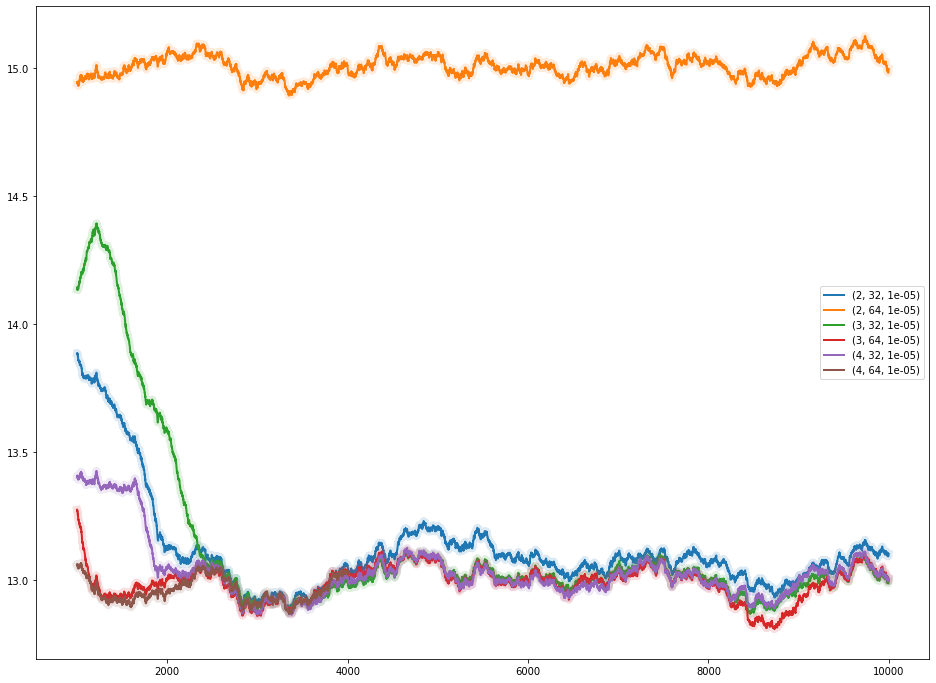

In [205]:
plt.figure(figsize=(16, 12))
generate_variation_plot(df, ['gnn_depth', 'hidden_size', 'learning_rate'], 1000)